In [1]:
# importando as bibliotecas
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
# importando os dados do MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
# verificando os dados de treino e teste
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
# definindo uma lista com os nomes das classes
class_name = ['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

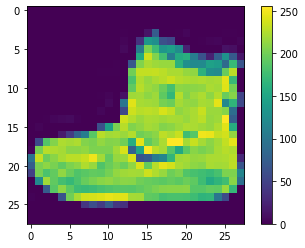

In [8]:
# plotando os dados de uma imagem
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Realizando a escala dos valores entre 0 e 1 antes de alimentar o modelo
train_images = train_images / 255.0
test_images = test_images / 255.0

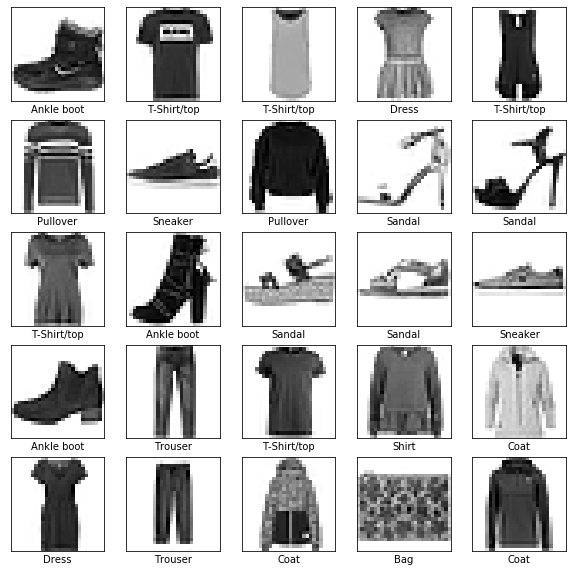

In [12]:
# Verificando as 25 primeiras imagens se estão no formato correto
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.show()

In [13]:
# Construindo o Modelo e suas camadas
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [17]:
# Compilando o modelo
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
# Treinando o modelo
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4961 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3744 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3125 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2930 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2785 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2658 - accuracy: 0.9022
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2552 - accuracy: 0.9058
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2451 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

In [19]:
# Avaliando a acuracia
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('Test Accuracy: ', test_acc)

313/313 - 0s - loss: 0.3341 - accuracy: 0.8859
Test Accuracy:  0.8859000205993652


In [36]:
# Realizando a predição
predictions = model.predict(test_images)

In [24]:
# Valor de maior confiança encontrado na predição (valor da labels que o modelo preveu)
np.argmax(predictions[0])

9

In [37]:
# Mostrando graficamente um conjunto com 10 previsões
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel('{} {:2.0f}% ({})'.format(class_name[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_name[true_label]),
                                         color = color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

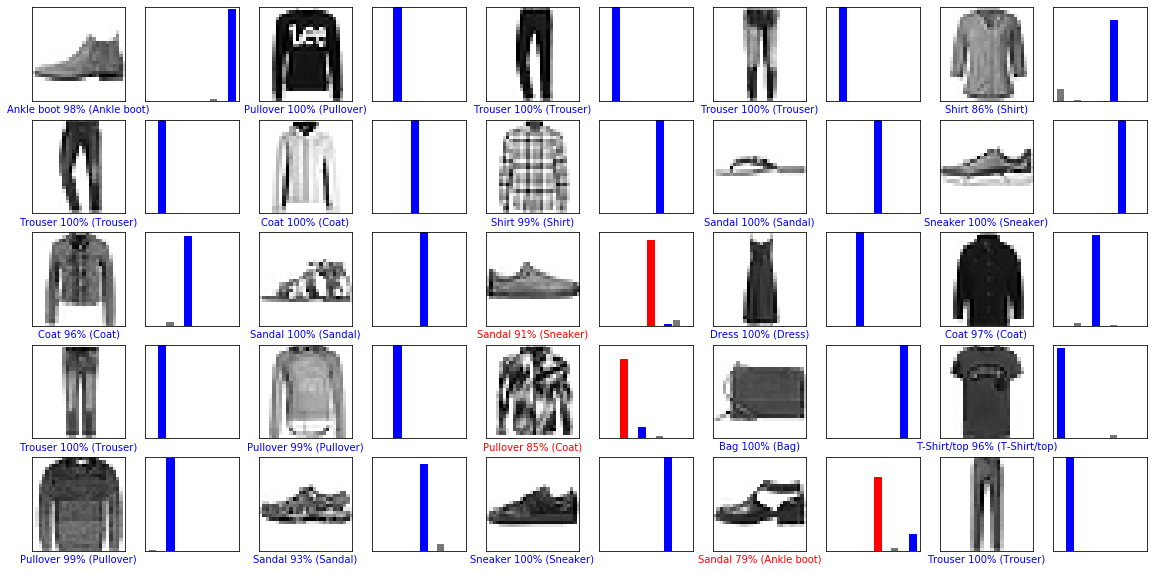

In [50]:
# vamos verificar a previsão da imagem na posição 0
# plota o primeiro X test images, e as labels preditas e as labels verdadeiras
# colore as predições corretas em azul e as incorretas em vermelho
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

(28, 28)
(1, 28, 28)
[[9.95456276e-07 3.74153014e-10 4.22220978e-08 1.90397049e-08
  5.09662801e-09 6.28236667e-05 1.13089345e-05 2.04890780e-02
  1.82616262e-07 9.79435563e-01]]
9


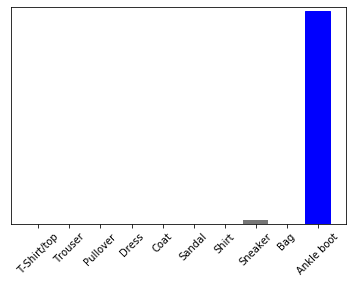

In [57]:
# usando o modelo treinado para fazer uma unic previsão
img = test_images[0]
print(img.shape)

# adicionando a imagem em um batch que possui um só membro
img = (np.expand_dims(img, 0))
print(img.shape)

# agora iremos realizar o predição dessa imagem
predictions_single = model.predict(img)
print(predictions_single)

# plot do resultado da predição
plot_value_array(0, predictions_single, test_labels) 
_ = plt.xticks(range(10), class_name, rotation = 45)

print(np.argmax(predictions_single[0]))